In [1]:
import pandas as pd

In [21]:
sam = pd.read_csv('SAM_database.csv')
sam.dropna(subset=['ZIP_CODE', 'MAILING_NEIGHBORHOOD'], inplace=True)

# Group by ZIP_CODE and find the most common MAILING_NEIGHBORHOOD, handling groups with no data
most_common_neighborhood = sam.groupby('ZIP_CODE')['MAILING_NEIGHBORHOOD'].agg(
    lambda x: x.value_counts().index[0] if not x.empty else 'No Data'
)

# neighborhood_for_zip_2128 = most_common_neighborhood.get(2145.0, default='No Data Available')
# print(neighborhood_for_zip_2128)

No Data Available


/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/2318552502.py:1: DtypeWarning: Columns (8,9,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  sam = pd.read_csv('SAM_database.csv')


In [48]:
import re

def clean_column_names(columns):
    # This new pattern will also remove underscores along with all other non-alphanumeric characters
    return [re.sub(r'[^\w\s]', '', col.replace('_', '')).upper() for col in columns]

START_YEAR = 2004
END_YEAR = 2024

file_names = [f'PropertyAssessmentDatasets/assess{year}.csv' for year in range(START_YEAR, END_YEAR)]
years = list(range(START_YEAR, END_YEAR))

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file name and corresponding year
for file_name, year in zip(file_names, years):
    # Load the CSV file
    df = pd.read_csv(file_name)
    
    # Create a new column 'Year' that contains the year for each row
    df['YEAR'] = year
    
    # Define the columns you always want to include
    specific_columns = ['PID', 'LU', 'YEAR']

    # Use list comprehension to find any column that contains 'ZIP'
    zip_columns = [col for col in df.columns if 'ZIP' in col]
    
    # Combine the lists of columns
    desired_columns = specific_columns + zip_columns

    # Check if the specified columns exist in the DataFrame to avoid KeyErrors
    desired_columns = [col for col in desired_columns if col in df.columns]

    # Select these columns from the DataFrame
    filtered_df = df[desired_columns]
    
    if 'ZIP_CODE' in filtered_df.columns:
        filtered_df.rename(columns={'ZIP_CODE': 'ZIPCODE'}, inplace=True)
#     df.columns = clean_column_names(df.columns)
    
#     print(f'Columns for {year}: {df.columns}')
#     print(f'Shape for {year}: {df.shape}')
#     print()
    # Append the DataFrame to the list
    dataframes.append(filtered_df)
    
all_data = pd.concat(dataframes, ignore_index=True)
all_data.head()

/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/1654202044.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/1654202044.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/1654202044.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/1654202044.py:19: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/1654202044.py:19: DtypeWarning: Columns (6,13) have mixed types. Specify dtype optio

,PID,LU,YEAR,ZIPCODE,MAIL_ZIP,MAIL_ZIPCODE,Owner_MAIL_ZIPCODE,OWNER_MAIL_ZIPCODE
0,100043000,R3,2004,2128.0,02145,NaN,NaN,NaN
1,100044000,R3,2004,2128.0,02128,NaN,NaN,NaN
2,100045000,R3,2004,2128.0,02128,NaN,NaN,NaN
3,100046000,R2,2004,2128.0,02128,NaN,NaN,NaN
4,100047000,R3,2004,2128.0,01801,NaN,NaN,NaN


In [46]:
all_data[all_data["ZIPCODE"] == '237-A']

,PID,LU,ZIPCODE,MAIL_ZIP,MAIL_ZIPCODE,Owner_MAIL_ZIPCODE,OWNER_MAIL_ZIPCODE
144381,100213002,CD,237-A,02128,NaN,NaN,NaN


In [55]:
all_data['ZIPCODE'] = pd.to_numeric(all_data['ZIPCODE'], errors='coerce')

# Remove any rows that contain 'NaN' in the 'ZIPCODE' column
all_data = all_data.dropna(subset=['ZIPCODE'])

most_common_neighborhood.index = most_common_neighborhood.index.astype(float)
all_data['neighborhood'] = all_data['ZIPCODE'].map(most_common_neighborhood)

all_data[all_data['YEAR'] == 2004]

,PID,LU,YEAR,ZIPCODE,MAIL_ZIP,MAIL_ZIPCODE,Owner_MAIL_ZIPCODE,OWNER_MAIL_ZIPCODE,neighborhood
0,100043000,R3,2004,2128.0,02145,NaN,NaN,NaN,East Boston
1,100044000,R3,2004,2128.0,02128,NaN,NaN,NaN,East Boston
2,100045000,R3,2004,2128.0,02128,NaN,NaN,NaN,East Boston
3,100046000,R2,2004,2128.0,02128,NaN,NaN,NaN,East Boston
4,100047000,R3,2004,2128.0,01801,NaN,NaN,NaN,East Boston
...,...,...,...,...,...,...,...,...,...
144158,2205666000,E,2004,2135.0,2135.0,NaN,NaN,NaN,Brighton
144159,2205667000,RL,2004,2135.0,2199.0,NaN,NaN,NaN,Brighton
144160,2205668000,R3,2004,2135.0,2135.0,NaN,NaN,NaN,Brighton
144161,2205669000,C,2004,2135.0,2199.0,NaN,NaN,NaN,Brighton


In [54]:
yearly_counts = all_data.groupby('YEAR').size()
# rate_of_change = yearly_counts.pct_change()
print(yearly_counts)

YEAR
2004    144040
2005     28310
2006    148799
2007    151743
2008    155458
2009    158091
2010    160079
2011    161256
2012    164842
2013    165603
2015        11
2018    172834
2019    174661
2020    175043
2021    177091
2022    178598
2023    180624
dtype: int64


In [57]:
permits = pd.read_csv('approvedpermits.csv')
permits.head()

/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/2616885822.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  permits = pd.read_csv('approvedpermits.csv')


,permitnumber,worktype,permittypedescr,description,comments,applicant,declared_valuation,total_fees,issued_date,expiration_date,...,address,city,state,zip,property_id,parcel_id,gpsy,gpsx,geom_point_2249,geom_point_4326
0,A1000569,INTEXT,Amendment to a Long Form,Interior/Exterior Work,This work is to Amend Permit ALT347244. Elimin...,Patrick Sharkey,"$36,500.00",$390.00,2021-01-28 16:29:26+00,2021-07-28 04:00:00+00,...,181-183 State ST,Boston,MA,2109.0,130392.0,3.038070e+08,2.956235e+06,777000.467775,0101000020C9080000014080EF50B6274128B89653E58D...,0101000020E6100000A703291D63C351C074AD05ECF92D...
1,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,"$40,000.00",$29.00,2011-11-04 15:04:58+00,2012-05-04 04:00:00+00,...,175 W Boundary RD,West Roxbury,MA,2132.0,17268.0,2.012032e+09,2.920239e+06,751016.119559,0101000020C908000081DB363D50EB264164AA649F9747...,0101000020E61000005F23793993C951C071ECAA3E6021...
2,A1001012,OTHER,Amendment to a Long Form,Other,Amend Alt943748 to erect a roof deck as per pl...,Jusimar Oliveria,"$5,000.00",$70.00,2020-06-01 18:08:47+00,NaN,...,15 Prospect ST,Charlestown,MA,2129.0,113443.0,2.028370e+08,2.962078e+06,775710.380542,0101000020C90800007E6BD6C23CAC2741422F500F4F99...,0101000020E6100000F053B47AAFC351C0A6BB62F20730...
3,A1001201,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Build steel balcony over garden level with sta...,Andreas Hwang,"$74,295.75",$803.00,2019-11-13 18:38:56+00,2020-05-13 04:00:00+00,...,211 W Springfield ST,Roxbury,MA,2118.0,129994.0,4.025580e+08,2.949423e+06,769648.312793,0101000020C9080000025726A0E07C274183505E499780...,0101000020E6100000D72A24D322C551C044521DC4982B...
4,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,"$15,000.00",$182.00,2013-01-03 19:13:09+00,2013-07-03 04:00:00+00,...,14 William Jackson AVE,Brighton,MA,2135.0,149852.0,2.204944e+09,2.950791e+06,749690.298790,0101000020C9080000FCFDFA98F4E02641F6694F594383...,0101000020E61000009DED6FF7DBC951C0929A5BD71B2C...


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

years = range(2004, 2025)  # From 2004 to 2024
property_counts = []

for year in years:
    # Assume files are named 'assessYEAR.csv' and are in the 'PropertyAssessmentDatasets' directory
    file_path = f'PropertyAssessmentDatasets/assess{year}.csv'
    df = pd.read_csv(file_path)
    property_counts.append(len(df))

property_counts_series = pd.Series(property_counts, index=years)

/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/432680075.py:11: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/432680075.py:11: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/432680075.py:11: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/432680075.py:11: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/432680075.py:11: DtypeWarning: Columns (6,13) have mixed types. Specify dtype option on 

In [63]:
property_rate_of_change = property_counts_series.pct_change().fillna(0)
print(property_rate_of_change)

2004    0.000000
2005    0.012590
2006    0.020106
2007    0.019790
2008    0.024391
2009    0.016251
2010    0.012594
2011    0.007359
2012    0.022237
2013    0.004616
2014   -0.009160
2015    0.024523
2016    0.006448
2017    0.010112
2018    0.011298
2019    0.010570
2020    0.002198
2021    0.011648
2022    0.008510
2023    0.011361
2024    0.008941
dtype: float64


In [64]:
permits_df = pd.read_csv('approvedpermits.csv')
permits_df['issued_date'] = pd.to_datetime(permits_df['issued_date']).dt.year  # Convert issued_date to year
permit_counts = permits_df.groupby('issued_date').size()
print(permit_counts)
permit_rate_of_change = permit_counts.pct_change().fillna(0)


/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/2975144484.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  permits_df = pd.read_csv('approvedpermits.csv')


issued_date
2006        1
2007        1
2009      992
2010    36700
2011    41211
2012    42701
2013    43218
2014    46910
2015    47344
2016    48573
2017    48657
2018    47578
2019    48945
2020    34908
2021    40560
2022    43084
2023    41270
2024     5045
dtype: int64


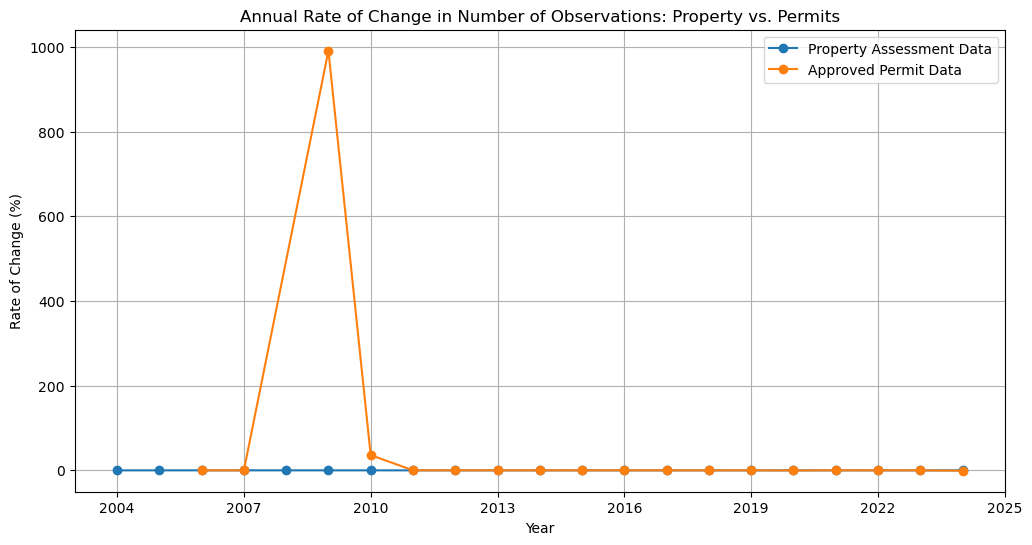

In [62]:
plt.figure(figsize=(12, 6))
ax = plt.gca()  # Get the current Axes instance on the current figure

# Plotting property data
property_rate_of_change.plot(ax=ax, x='Year', y='Rate of Change', style='-o', label='Property Assessment Data')

# Plotting permit data
permit_rate_of_change.plot(ax=ax, x='Year', y='Rate of Change', style='-o', label='Approved Permit Data')

plt.title('Annual Rate of Change in Number of Observations: Property vs. Permits')
plt.xlabel('Year')
plt.ylabel('Rate of Change (%)')
plt.grid(True)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer labels on x-axis
plt.legend()
plt.show()

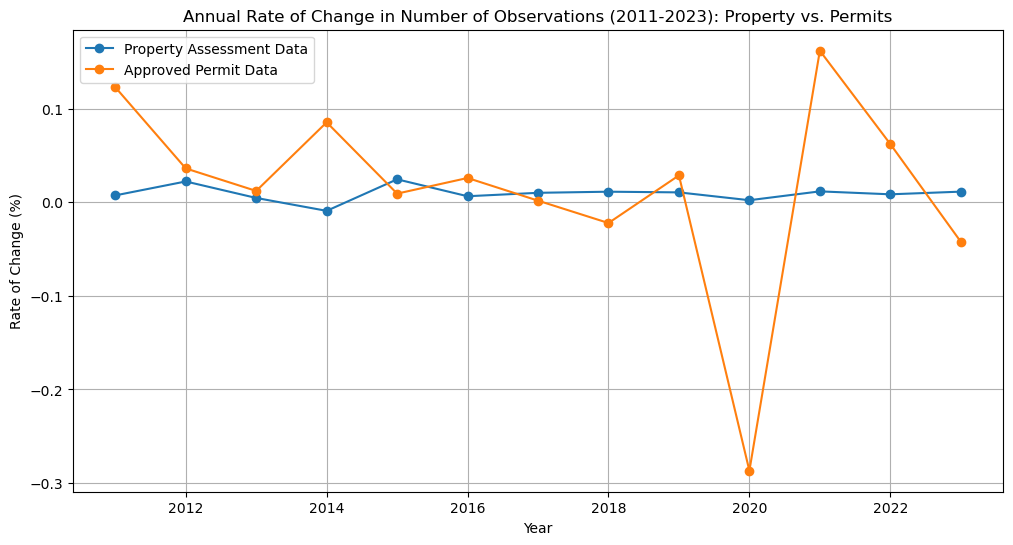

Correlation Coefficient: 0.08609250367064819


In [68]:
# Filtering the property assessment rate of change
filtered_property_rate_of_change = property_rate_of_change[(property_rate_of_change.index >= 2011) & (property_rate_of_change.index <= 2023)]

# Filtering the permit rate of change
filtered_permit_rate_of_change = permit_rate_of_change[(permit_rate_of_change.index >= 2011) & (permit_rate_of_change.index <= 2023)]

plt.figure(figsize=(12, 6))
ax = plt.gca()  # Get the current Axes instance on the current figure

# Plotting filtered property data
filtered_property_rate_of_change.plot(ax=ax, style='-o', label='Property Assessment Data')

# Plotting filtered permit data
filtered_permit_rate_of_change.plot(ax=ax, style='-o', label='Approved Permit Data')

plt.title('Annual Rate of Change in Number of Observations (2011-2023): Property vs. Permits')
plt.xlabel('Year')
plt.ylabel('Rate of Change (%)')
plt.grid(True)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Ensure integer labels on x-axis
plt.legend()
plt.show()


# Assuming 'filtered_property_rate_of_change' and 'filtered_permit_rate_of_change' are already defined and filtered
# Align both series to the same years
common_years = filtered_property_rate_of_change.index.intersection(filtered_permit_rate_of_change.index)
aligned_property = filtered_property_rate_of_change.reindex(common_years)
aligned_permits = filtered_permit_rate_of_change.reindex(common_years)
# Calculate the correlation coefficient
correlation_coefficient = aligned_property.corr(aligned_permits)
print("Correlation Coefficient:", correlation_coefficient)


In [72]:
import pandas as pd

# Initialize an empty dictionary to hold yearly data frames indexed by ZIP code
property_counts = {}

# Load each year's data
for year in range(2010, 2024):
    df = pd.read_csv(f'PropertyAssessmentDatasets/assess{year}.csv')
    if 'ZIPCODE' in df.columns:
        count_by_zip = df.groupby('ZIPCODE').size()
    else:
        count_by_zip = df.groupby('ZIP_CODE').size()
    property_counts[year] = count_by_zip

# Convert the dictionary into a DataFrame
property_counts_df = pd.DataFrame(property_counts)
property_rate_of_change = property_counts_df.pct_change(axis=1)

permits_data = pd.read_csv('approvedpermits.csv')
permits_data['YEAR'] = pd.to_datetime(permits_data['issued_date']).dt.year

# Group by ZIP code and year, then count entries
permit_counts = permits_data.groupby(['zip', 'YEAR']).size().unstack()
permit_rate_of_change = permit_counts.pct_change(axis=1)

/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/600774976.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'PropertyAssessmentDatasets/assess{year}.csv')
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/600774976.py:8: DtypeWarning: Columns (13,25,26,27,33,34,37,41,44,45,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'PropertyAssessmentDatasets/assess{year}.csv')
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/600774976.py:8: DtypeWarning: Columns (13,42,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'PropertyAssessmentDatasets/assess{year}.csv')
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/600774976.py:8: DtypeWarning: Columns (13,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assume property_rate_of_change and permit_rate_of_change are already computed
correlations = {}
zip_codes = set(property_rate_of_change.index).intersection(permit_rate_of_change.index)

for zip_code in zip_codes:
    property_values = property_rate_of_change.loc[zip_code].dropna()
    permit_values = permit_rate_of_change.loc[zip_code].dropna()
    common_years = property_values.index.intersection(permit_values.index)
    if not common_years.empty:
        corr = property_values[common_years].corr(permit_values[common_years])
        correlations[zip_code] = corr

# Sorting the correlations to find the top 5
correlation_series = pd.Series(correlations).sort_values(ascending=False)
top_5_zip_codes = correlation_series.head(5)
print("Top 5 ZIP Codes and their Correlations:")
print(top_5_zip_codes)


Top 5 ZIP Codes and their Correlations:
2109.0    0.331474
2119.0    0.310664
2130.0    0.299502
2136.0    0.298055
2124.0    0.275539
dtype: float64


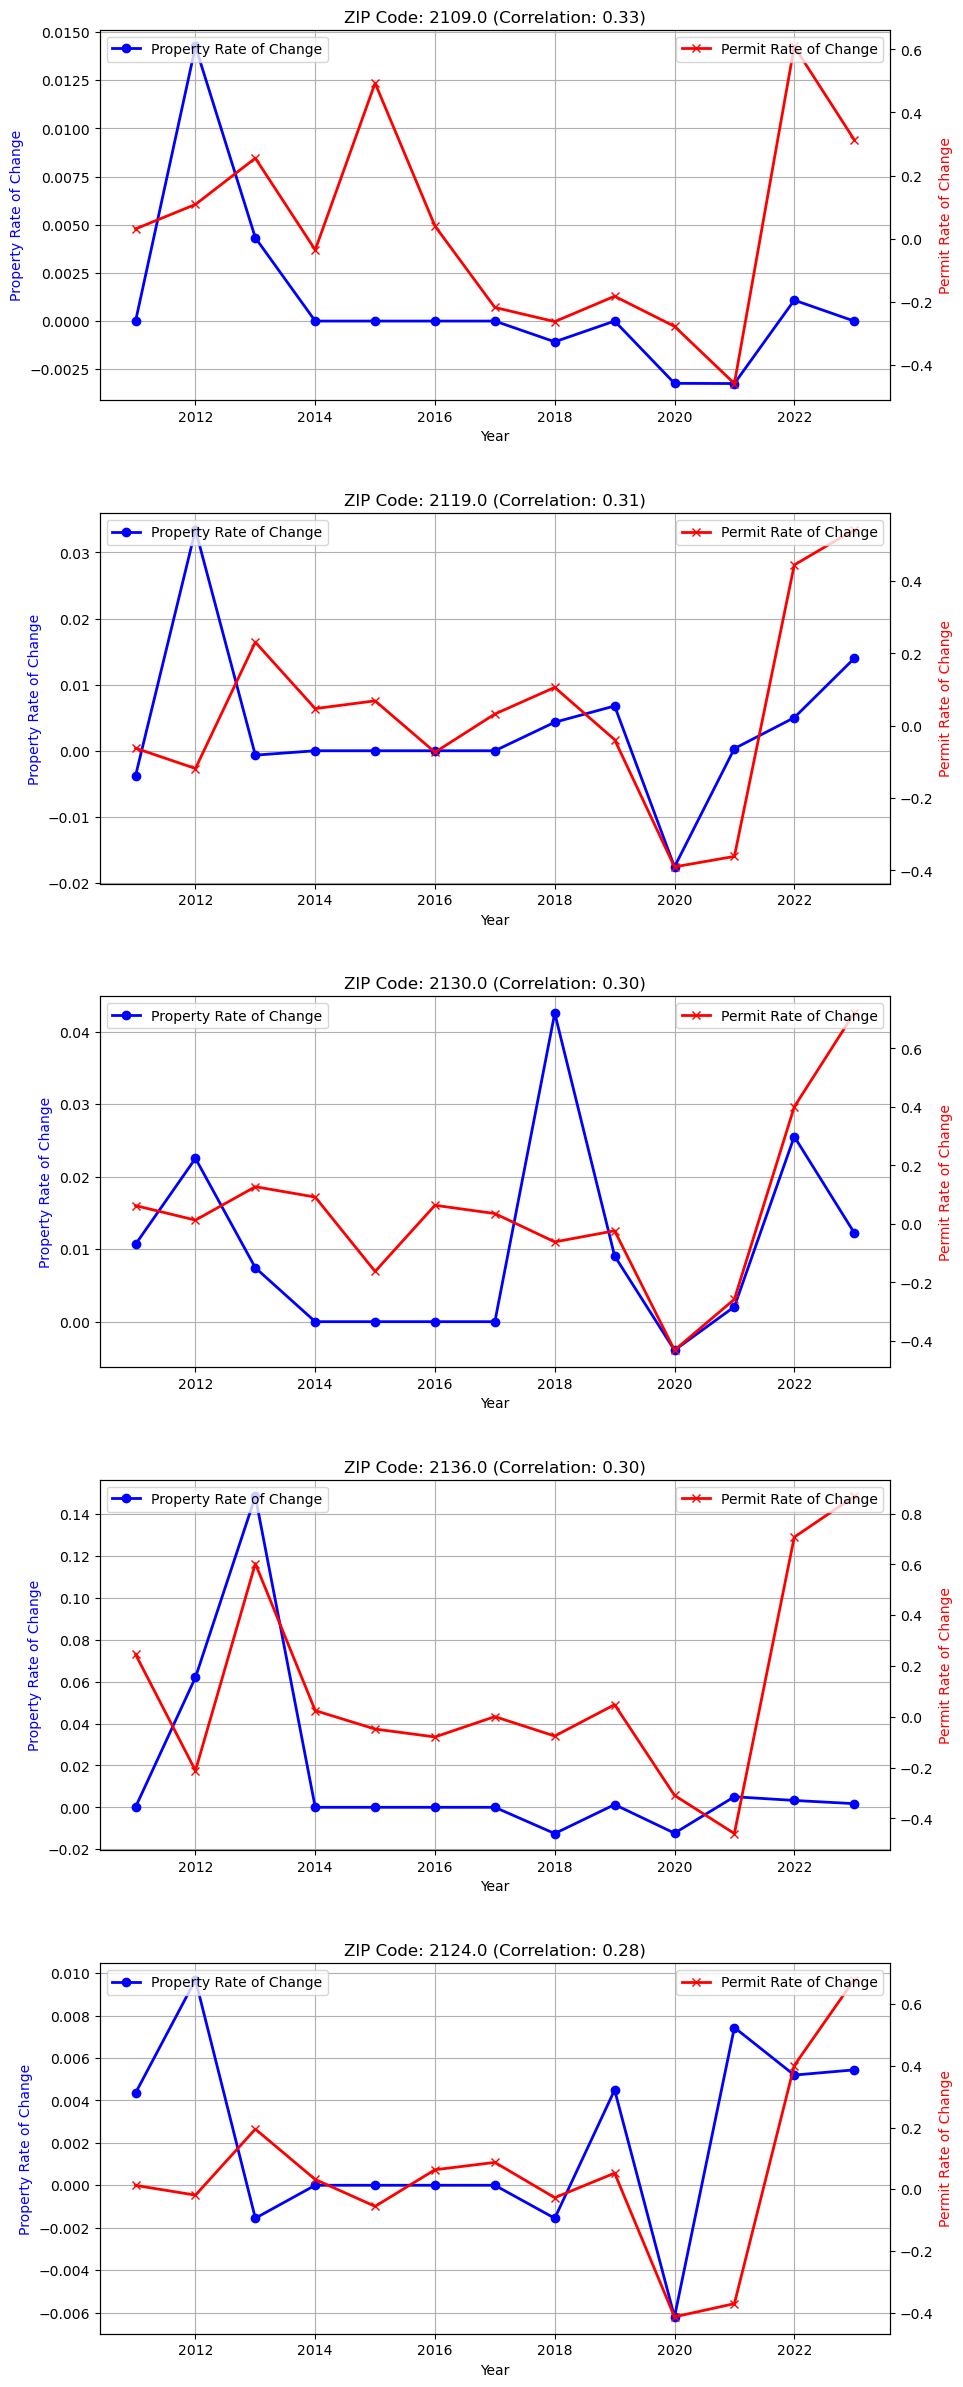

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Assume we have already calculated 'top_5_zip_codes'
# Setting up the plotting environment
fig, axes = plt.subplots(5, 1, figsize=(10, 25))  # 5 rows, 1 column of graphs
fig.tight_layout(pad=6.0)  # Add space between plots

for idx, (zip_code, corr) in enumerate(top_5_zip_codes.items()):
    ax1 = axes[idx]  # First y-axis for property data
    ax2 = ax1.twinx()  # Second y-axis for permit data

    # Fetch the data for both datasets
    prop_data = property_rate_of_change.loc[zip_code].dropna()
    perm_data = permit_rate_of_change.loc[zip_code].dropna()
    common_years = np.sort(list(set(prop_data.index).intersection(perm_data.index)))

    # Plotting
    ax1.plot(common_years, prop_data.loc[common_years], marker='o', linestyle='-', color='blue', label='Property Rate of Change', linewidth=2)
    ax2.plot(common_years, perm_data.loc[common_years], marker='x', linestyle='-', color='red', label='Permit Rate of Change', linewidth=2)

    # Set titles, labels, and grids
    ax1.set_title(f'ZIP Code: {zip_code} (Correlation: {corr:.2f})')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Property Rate of Change', color='blue')
    ax2.set_ylabel('Permit Rate of Change', color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.grid(True)

plt.show()


In [78]:
lu_weights = {
    'A': 7,
    'R1': 1,
    'R2': 2,
    'R3': 3,
    'R4': 4
}

import pandas as pd

# Initialize an empty DataFrame to collect data
property_data = pd.DataFrame()

for year in range(2011, 2024):
    df = pd.read_csv(f'PropertyAssessmentDatasets/assess{year}.csv')
    df['WeightedCount'] = df['LU'].map(lu_weights).fillna(0)  # Apply weights, fill NA with 0 for unknown LU codes
    if 'ZIPCODE' in df.columns:
        weighted_counts_by_zip = df.groupby('ZIPCODE')['WeightedCount'].sum()
    else:
        weighted_counts_by_zip = df.groupby('ZIP_CODE')['WeightedCount'].sum()
    
    property_data = pd.concat([property_data, weighted_counts_by_zip.rename(year)], axis=1)

# Calculate the annual rate of change
property_rate_of_change = property_data.pct_change(axis=1)


permits_data = pd.read_csv('approvedpermits.csv')
permits_data['YEAR'] = pd.to_datetime(permits_data['issued_date']).dt.year

permit_counts = permits_data.groupby(['zip', 'YEAR']).size().unstack()
permit_rate_of_change = permit_counts.pct_change(axis=1)

/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/200083206.py:15: DtypeWarning: Columns (13,25,26,27,33,34,37,41,44,45,48,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'PropertyAssessmentDatasets/assess{year}.csv')
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/200083206.py:15: DtypeWarning: Columns (13,42,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'PropertyAssessmentDatasets/assess{year}.csv')
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/200083206.py:15: DtypeWarning: Columns (13,46,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'PropertyAssessmentDatasets/assess{year}.csv')
/var/folders/4h/2q1v376n4mqc0vz5g1f00mbw0000gn/T/ipykernel_2149/200083206.py:15: DtypeWarning: Columns (15,46,53,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df 

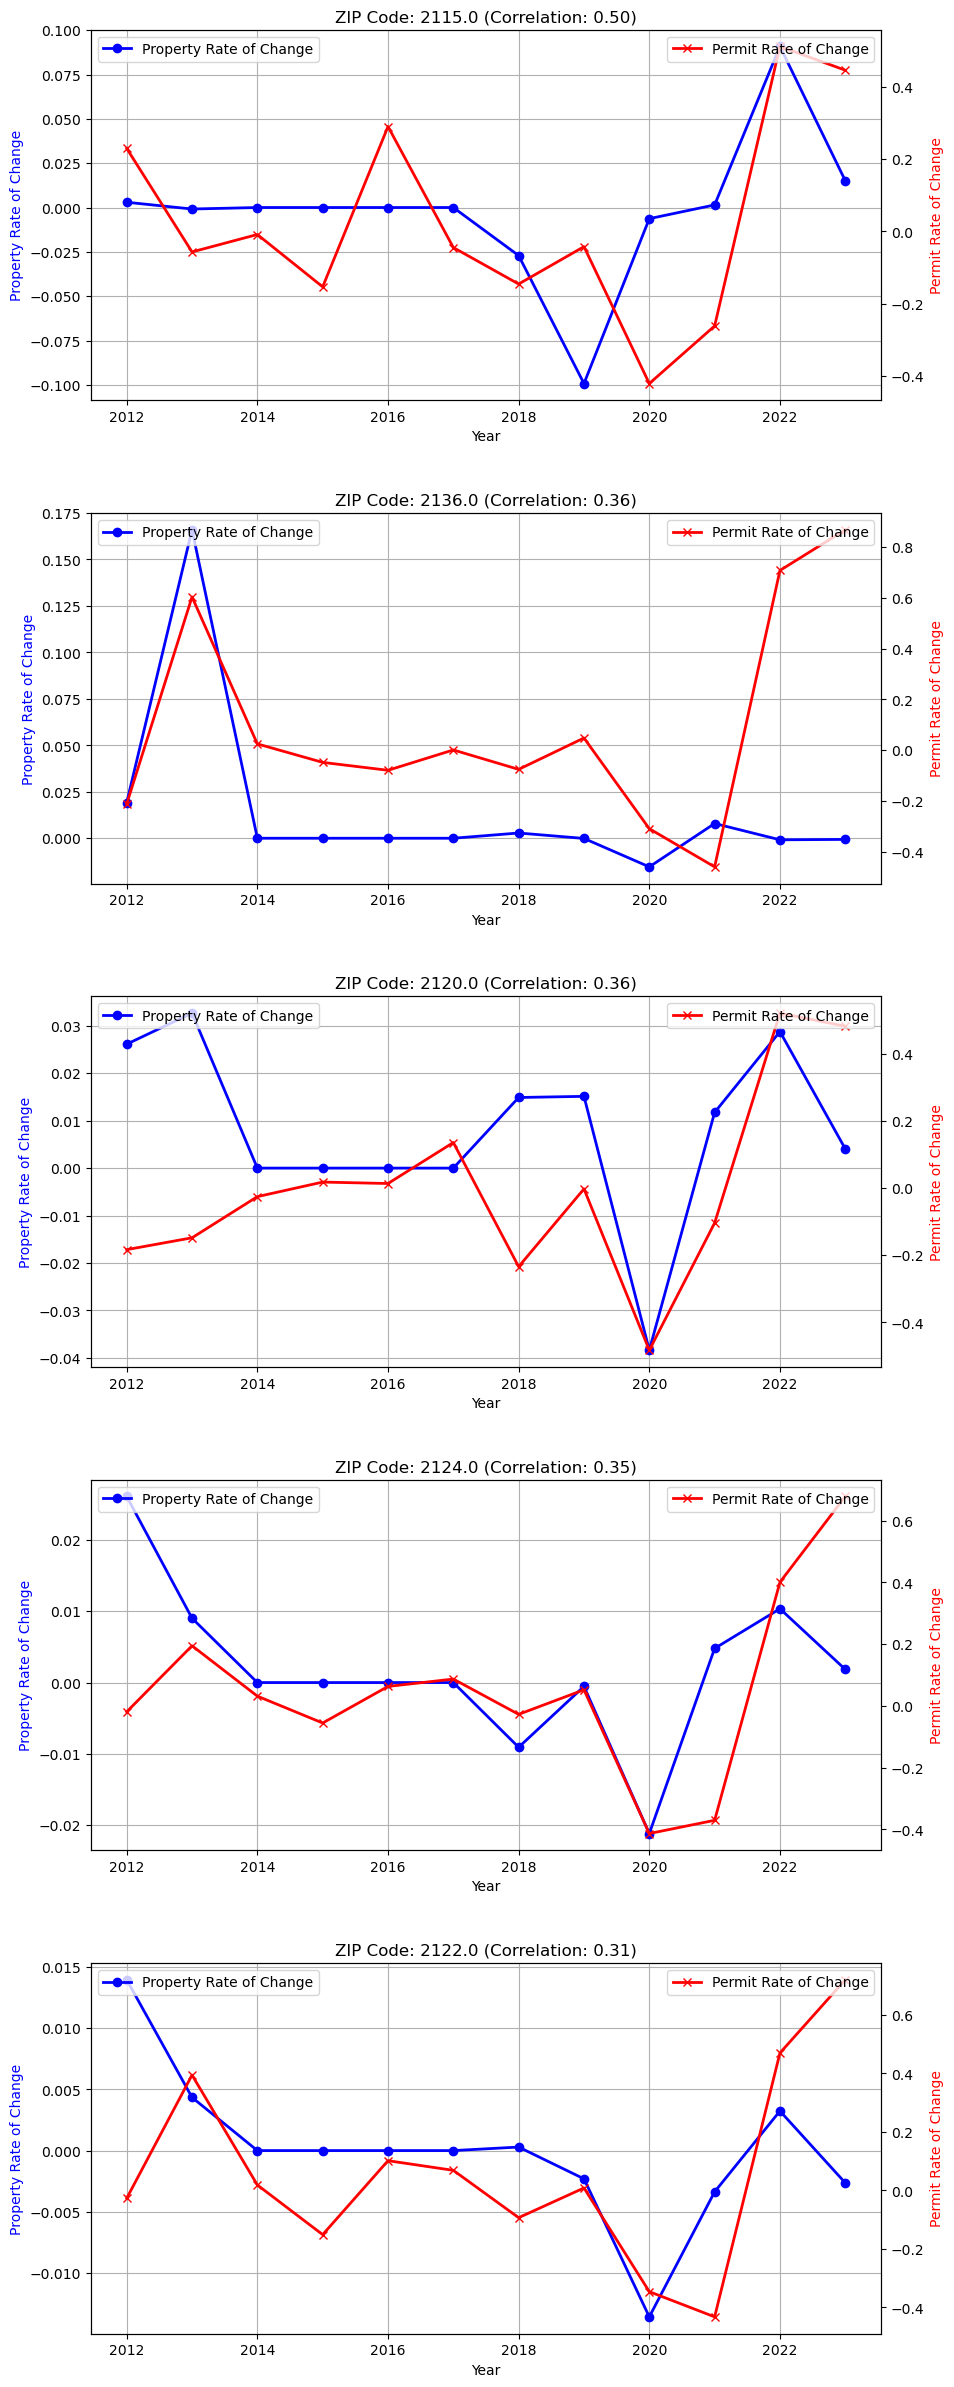

In [79]:
correlations = {}
zip_codes = set(property_rate_of_change.index).intersection(permit_rate_of_change.index)

for zip_code in zip_codes:
    prop_values = property_rate_of_change.loc[zip_code].dropna()
    perm_values = permit_rate_of_change.loc[zip_code].dropna()
    common_years = prop_values.index.intersection(perm_values.index)
    if not common_years.empty:
        corr = prop_values[common_years].corr(perm_values[common_years])
        correlations[zip_code] = corr

# Sort and find top 5
correlation_series = pd.Series(correlations).sort_values(ascending=False)
top_5_zip_codes = correlation_series.head(5)

# Plot each with dual axes
fig, axes = plt.subplots(5, 1, figsize=(10, 25))
fig.tight_layout(pad=6.0)

for idx, (zip_code, corr) in enumerate(top_5_zip_codes.items()):
    ax1 = axes[idx]
    ax2 = ax1.twinx()
    
    prop_data = property_rate_of_change.loc[zip_code].dropna()
    perm_data = permit_rate_of_change.loc[zip_code].dropna()
    common_years = np.sort(list(set(prop_data.index).intersection(perm_data.index)))

    ax1.plot(common_years, prop_data.loc[common_years], marker='o', linestyle='-', color='blue', label='Property Rate of Change', linewidth=2)
    ax2.plot(common_years, perm_data.loc[common_years], marker='x', linestyle='-', color='red', label='Permit Rate of Change', linewidth=2)

    ax1.set_title(f'ZIP Code: {zip_code} (Correlation: {corr:.2f})')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Property Rate of Change', color='blue')
    ax2.set_ylabel('Permit Rate of Change', color='red')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax1.grid(True)

plt.show()


In [80]:
# Assuming 'correlations' is a dictionary with ZIP codes as keys and correlation values as values

# Convert the dictionary to a pandas Series for easier handling
correlation_series = pd.Series(correlations).sort_values(ascending=False)

# Extract the top 5 ZIP codes with the highest correlations
top_5_zip_codes = correlation_series.head(5)

# Print the top 5 ZIP codes and their correlations
print("Top 5 ZIP Codes with the Highest Correlations:")
for zip_code, corr in top_5_zip_codes.items():
    print(f"ZIP Code: {zip_code}, Correlation: {corr:.4f}")

Top 5 ZIP Codes with the Highest Correlations:
ZIP Code: 2115.0, Correlation: 0.5004
ZIP Code: 2136.0, Correlation: 0.3634
ZIP Code: 2120.0, Correlation: 0.3621
ZIP Code: 2124.0, Correlation: 0.3503
ZIP Code: 2122.0, Correlation: 0.3101
